# Traffic Sign Recognition System using Neural networks

## Import Dependencies

In [21]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from warnings import simplefilter
simplefilter(action='ignore')

In [23]:
df = pd.read_csv('Train.csv')

## Data Inspection

In [24]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [25]:
df.shape

(39209, 8)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [27]:
data = []
labels = []

for index, row in df.iterrows():
    img_path = row['Path']
    try:
        image = Image.open(img_path)
        image = image.resize((30, 30))
        data.append(np.array(image))
        labels.append(row['ClassId'])
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

## Data preprocessing

### Handling Null Values

In [28]:
df.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

## EDA(Exploratory Data Analysis)

### Class Distribution

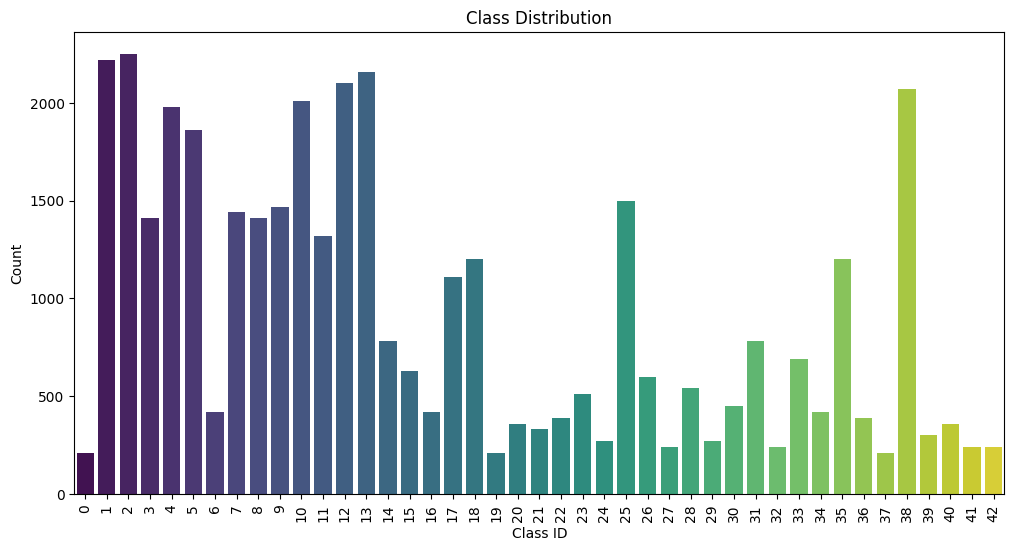

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ClassId', data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Convert to numpy arrays

In [30]:
from tensorflow.keras.utils import to_categorical

X = np.array(data) / 255.0
y = to_categorical(np.array(labels), num_classes=len(df['ClassId'].unique()))

## Train_test_split

In [31]:
# Split into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## Model Evaluation

In [33]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3837 - loss: 2.3445 - val_accuracy: 0.9265 - val_loss: 0.3203
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8769 - loss: 0.4227 - val_accuracy: 0.9698 - val_loss: 0.1448
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9399 - loss: 0.2107 - val_accuracy: 0.9842 - val_loss: 0.0750
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9609 - loss: 0.1384 - val_accuracy: 0.9883 - val_loss: 0.0527
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9717 - loss: 0.0997 - val_accuracy: 0.9890 - val_loss: 0.0456
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9752 - loss: 0.0818 - val_accuracy: 0.9902 - val_loss: 0.0448
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9824 - loss: 0.0632 - val_accuracy: 0.9925 - val_loss: 0.0370
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9831 - loss: 0.0552 - val_accu

## Line plot between Model Accuracy and Model Loss

Text(0.5, 1.0, 'Model Accuracy')

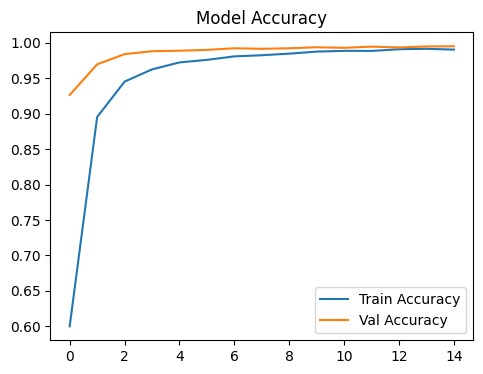

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

## Prediction using Test folder images

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


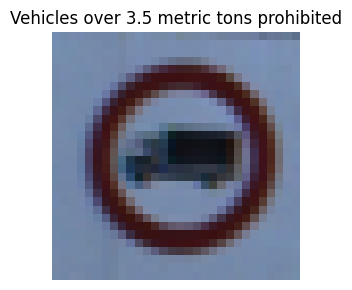

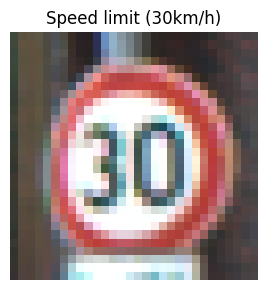

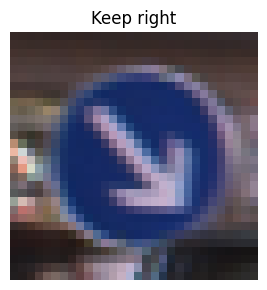

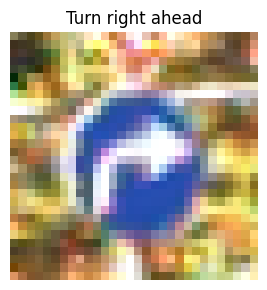

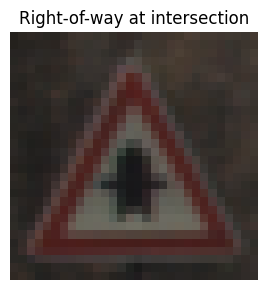

In [37]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# ---- Load Model ----
from tensorflow.keras.models import load_model


# ---- Load Test CSV ----
test_csv_path = 'Test.csv'     # replace with your actual test CSV filename

test_df = pd.read_csv(test_csv_path)

# ---- Manually Define Label Map ----
label_map = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No overtaking',
    10: 'No overtaking for trucks',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by trucks'
}

# ---- Load Test Images ----
X_test = []
image_paths = []

for i, row in test_df.iterrows():
    img_path = os.path.join(row['Path'])
    try:
        image = Image.open(img_path)
        image = image.resize((30, 30))
        image = np.array(image) / 255.0
        X_test.append(image)
        image_paths.append(img_path)
    except Exception as e:
        print(f"Could not load image {img_path}: {e}")

X_test = np.array(X_test)

# ---- Predict ----
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# ---- Display Predictions with Sign Names ----
for i in range(min(5, len(X_test))):  # show first 5 predictions
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i])
    
    pred_class = predicted_classes[i]
    sign_name = label_map.get(pred_class, f"Class {pred_class}")
    
    plt.title(sign_name, fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    print()